Reference: https://arxiv.org/pdf/2105.05233.pdf Appendix B.

In [1]:
import sys
sys.path.append('../src/')
from diffusion2 import DiffusionModel
import pytorch_lightning as pl
from torch.utils.data import DataLoader


In [2]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Load and scale data
data = np.load("../data/eb_subset_all.npz")
all_data = torch.tensor(data['phate'], dtype=torch.float32)
mean_val = torch.mean(all_data)
std_val = torch.std(all_data)
# Standardize data
scaled_data = (all_data - mean_val) / std_val

# Split into training and validation sets
train_data, val_data = train_test_split(scaled_data, test_size=0.2, random_state=42)

# Convert to tensor datasets
train_dataset = TensorDataset(train_data)
val_dataset = TensorDataset(val_data)

# Create DataLoaders
batch_size = 512
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [3]:
model = DiffusionModel(data_size=2, time_embedding_size=8, num_steps=1000)
trainer = pl.Trainer(max_epochs=1000, gpus=1)  # Adjust as per your setup
trainer.fit(model, train_loader)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'activation_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['activation_fn'])`.
  rank_zero_warn(
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:478: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend yo

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1000` reached.


In [4]:
gs = model.generate_samples(num_samples=3000)

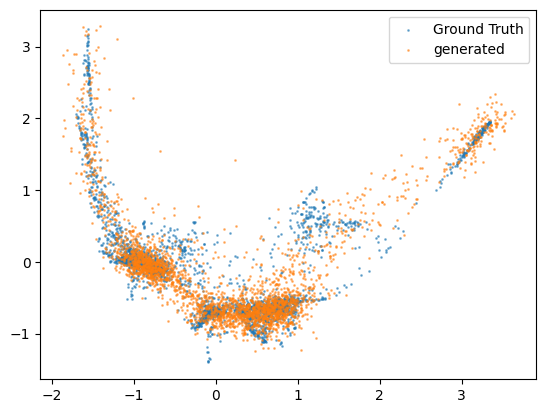

In [5]:
import matplotlib.pyplot as plt
gt = scaled_data.cpu().numpy()
plt.scatter(gt[:,0], gt[:,1], label='Ground Truth', s=1, alpha=0.5)
plt.scatter(gs[:, 0].cpu().numpy(), gs[:, 1].cpu().numpy(), s=1, label='generated', alpha=0.5)
plt.legend()

In [5]:
ids = np.arange(data['phate'].shape[0])
train_id, val_data = train_test_split(ids, test_size=0.2, random_state=42)
train_mask = np.isin(ids, train_id)
np.savez('../dm_data/eb_phate.npz', data=data['phate'], train_mask=train_mask)